In [7]:
import pickle
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation_util import plot, evaluate_on_dataset, perf_df

sc.set_figure_params(dpi=100, frameon=False, facecolor=None)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dss_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj'

In [4]:
performances = {}

In [10]:
def annotate(df):
    """Dataset specific source of ground truth."""
    df['dose'] = [0 if 'control' in x else float(x.split('_')[1]) for x in df.perturbation]
    df['log(dose)'] = [0 if 'control' in x else np.log10(float(x.split('_')[1])) for x in df.perturbation]

## simulated

In [14]:
%%time
with open('metric_runs_simulated2.pkl', 'rb') as file:
    results = pickle.load(file)
print(results.keys())

dict_keys(['100-pca-n_cells', '100-lognorm-n_cells', '100-counts-n_cells', '200-pca-n_cells', '200-lognorm-n_cells', '200-counts-n_cells', '300-pca-n_cells', '300-lognorm-n_cells', '300-counts-n_cells', '400-pca-n_cells', '400-lognorm-n_cells', '400-counts-n_cells', '500-pca-n_cells', '500-lognorm-n_cells', '500-counts-n_cells', '600-pca-n_cells', '600-lognorm-n_cells', '600-counts-n_cells', '10-lognorm-n_genes', '10-counts-n_genes', '10-pca-n_genes', '50-lognorm-n_genes', '50-counts-n_genes', '50-pca-n_genes', '100-lognorm-n_genes', '100-counts-n_genes', '100-pca-n_genes', '500-lognorm-n_genes', '500-counts-n_genes', '500-pca-n_genes', '1000-lognorm-n_genes', '1000-counts-n_genes', '1000-pca-n_genes', '2000-lognorm-n_genes', '2000-counts-n_genes', '2000-pca-n_genes', '5000-lognorm-n_genes', '5000-counts-n_genes', '5000-pca-n_genes', '10-lognorm-n_DEGs', '10-counts-n_DEGs', '20-lognorm-n_DEGs', '20-counts-n_DEGs', '30-lognorm-n_DEGs', '30-counts-n_DEGs', '40-lognorm-n_DEGs', '40-counts

In [15]:
# get metadata
params = pd.read_csv('../splatter_sim_params.csv').reset_index()
params['perturbation'] = [f'Path{x}' for x in params['index'].values]
params.perturbation.replace({'Path1': 'control'}, inplace=True)

def annotate(df):
    # annotate
    for col in params.columns:
        df[col] = df['perturbation'].map(dict(zip(params.perturbation, params[col])))
    df = df.dropna()  # dropping fake controls

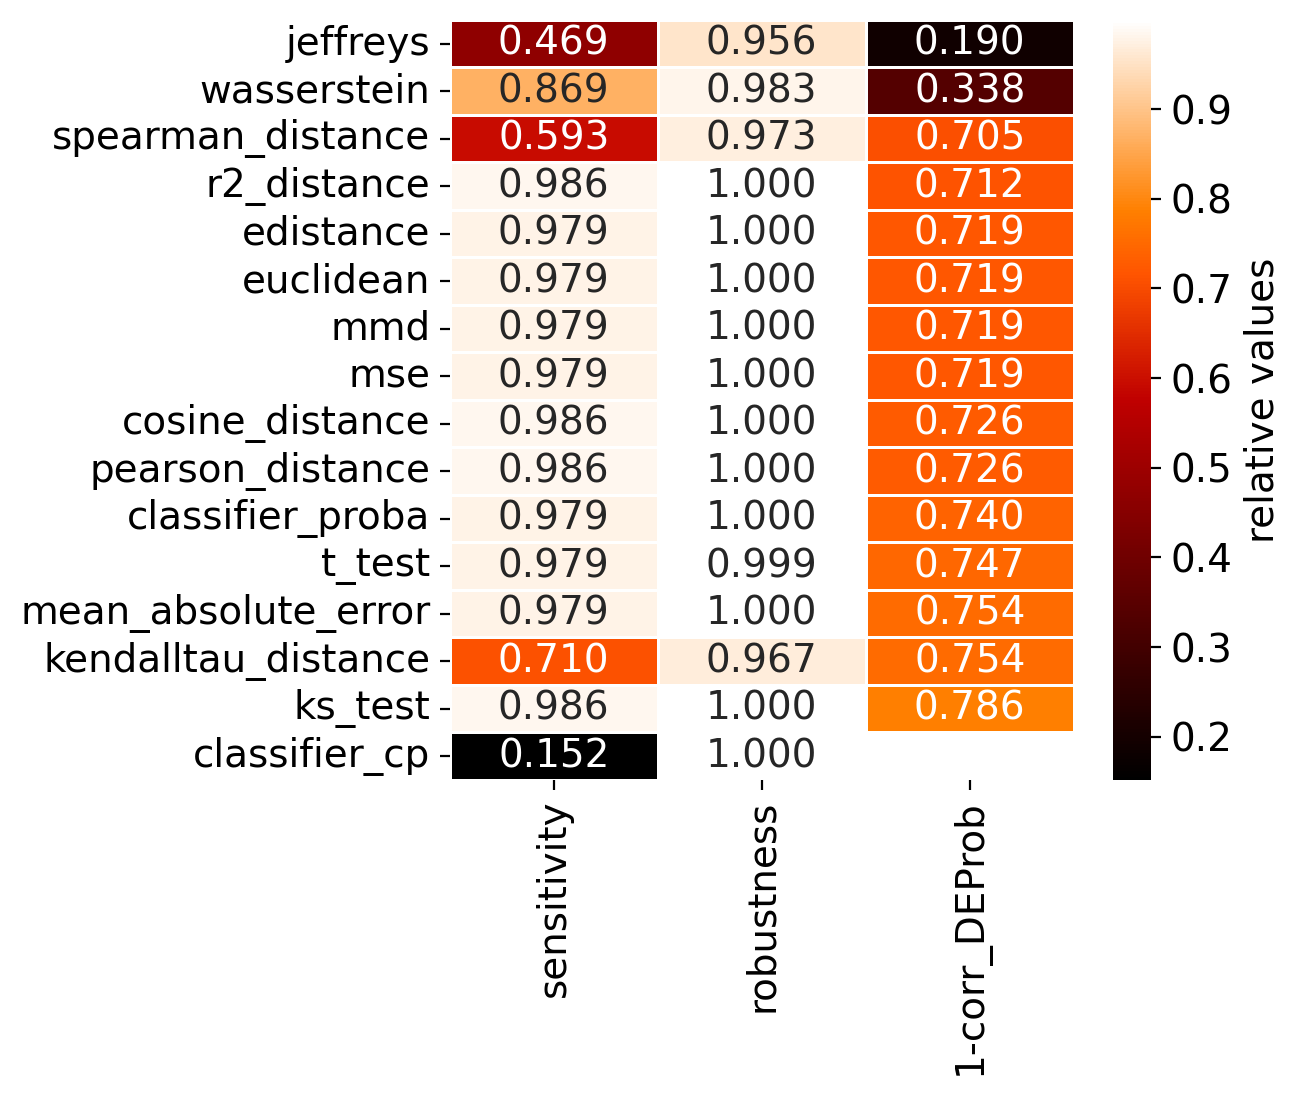

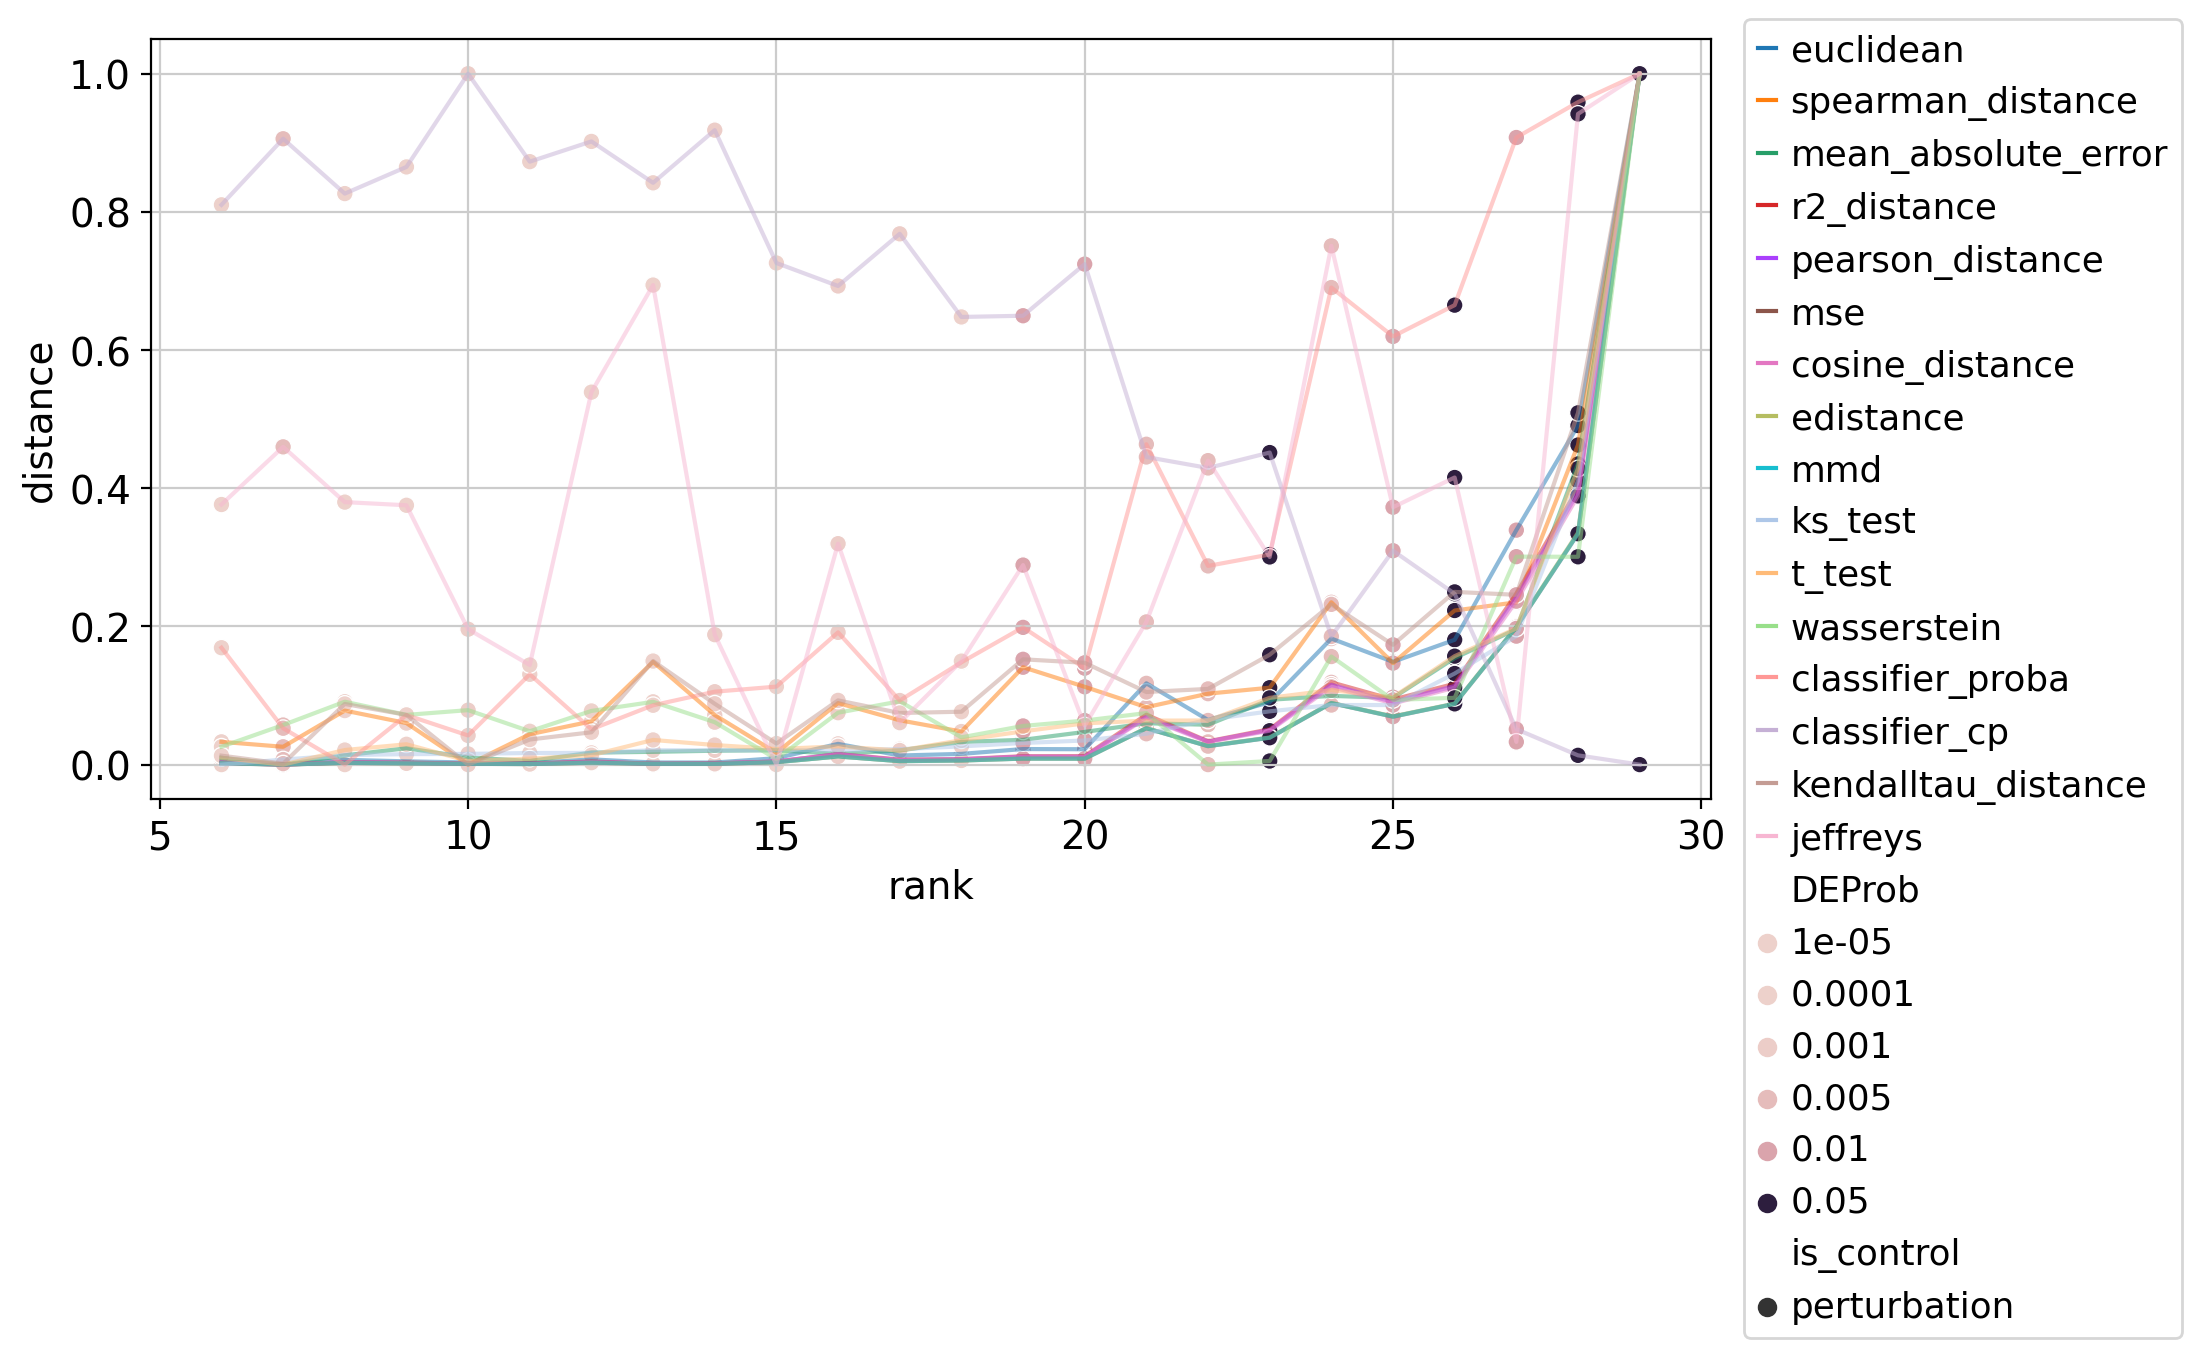

In [18]:
lognorm = evaluate_on_dataset(results, annotate, 'DEProb', 'ks_test')

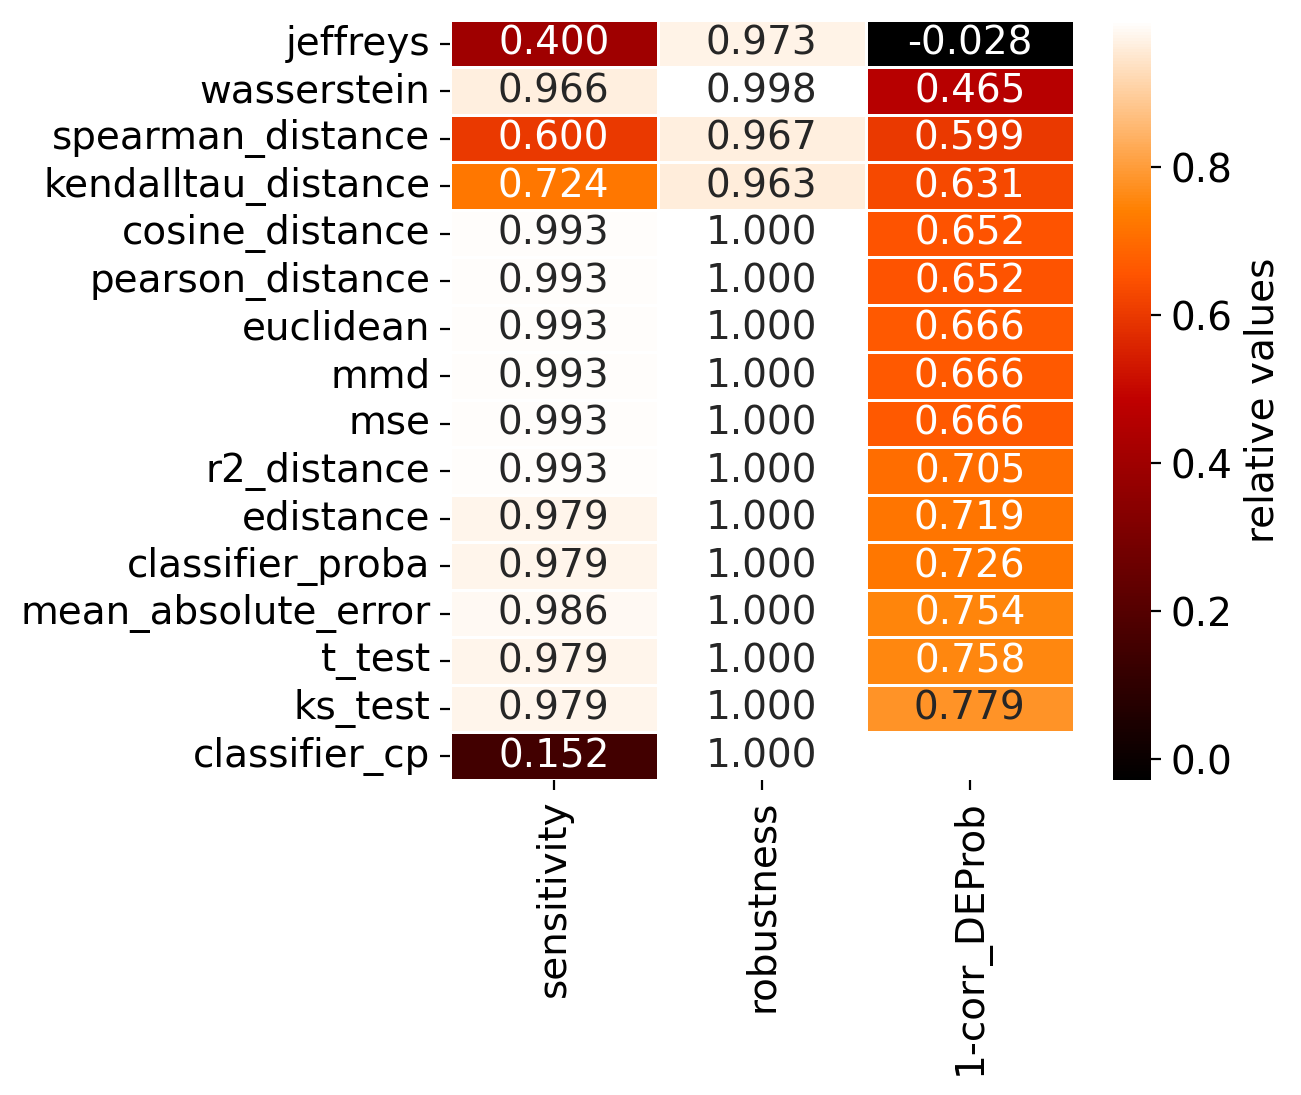

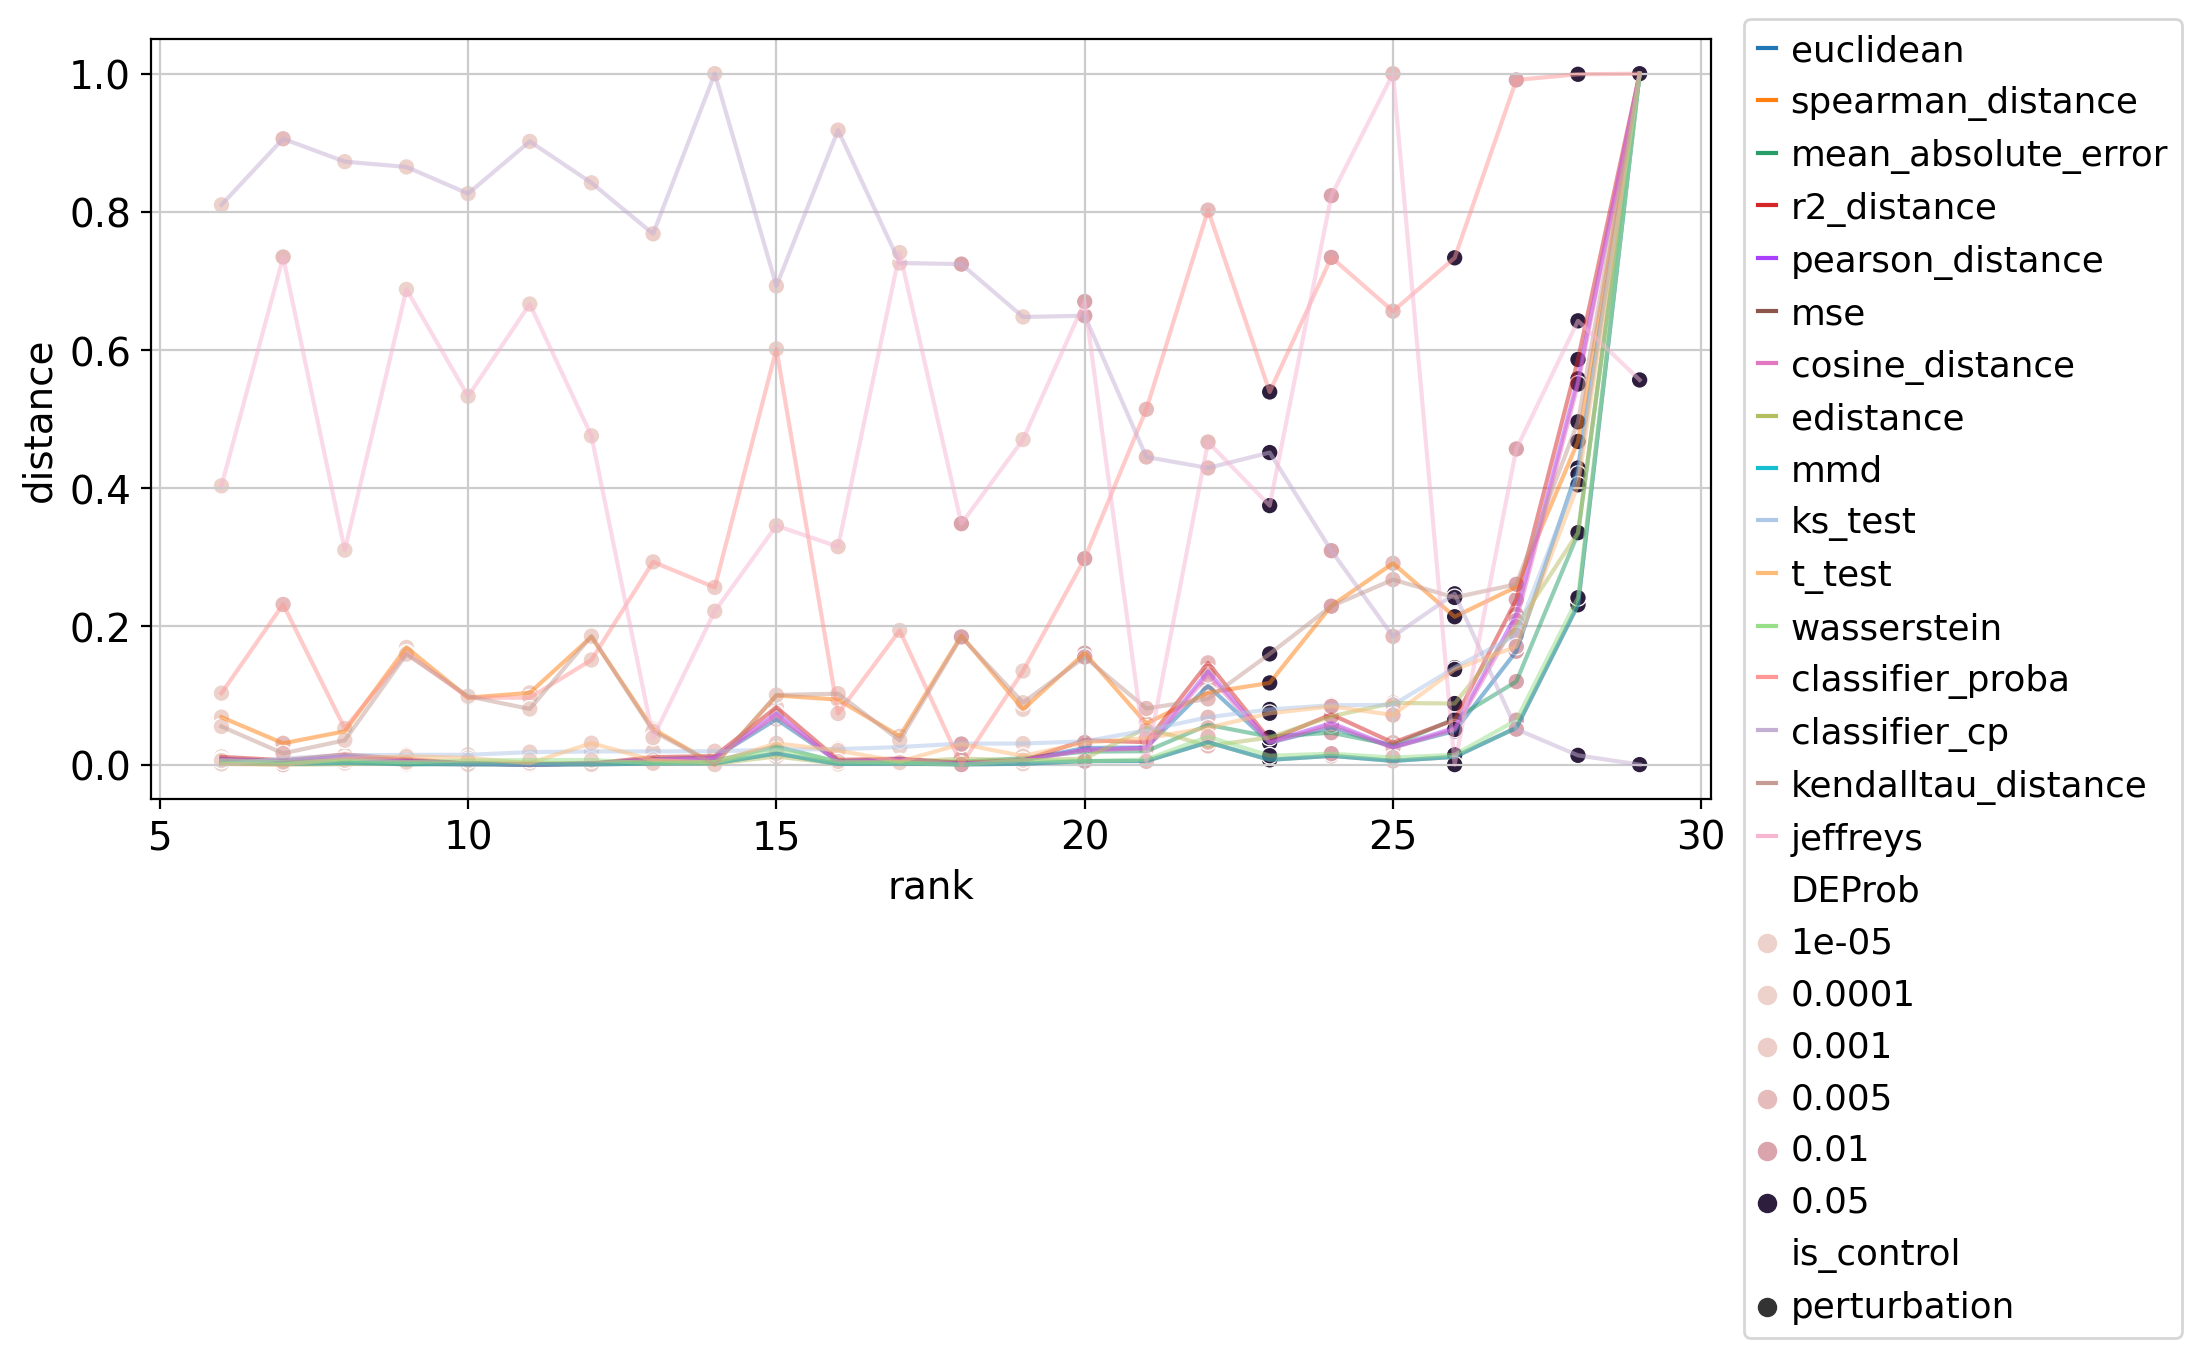

In [19]:
counts = evaluate_on_dataset(results, annotate, 'DEProb', 'ks_test', rep='counts')

In [23]:
from scipy.stats import pearsonr

In [34]:
agg = pd.concat([lognorm.add_suffix('_lognorm'), counts.add_suffix('_counts')], axis=1).dropna()
agg

,sensitivity_lognorm,robustness_lognorm,1-corr_DEProb_lognorm,sensitivity_counts,robustness_counts,1-corr_DEProb_counts
jeffreys,0.468966,0.956243,0.190325,0.400000,0.972889,-0.028196
wasserstein,0.868966,0.982521,0.338356,0.965517,0.997622,0.465239
spearman_distance,0.593103,0.973008,0.704907,0.600000,0.966944,0.599171
r2_distance,0.986207,0.999643,0.711956,0.993103,0.999762,0.704907
edistance,0.979310,0.999643,0.719006,0.979310,0.999643,0.719006
euclidean,0.979310,0.999643,0.719006,0.993103,0.999762,0.666137
mmd,0.979310,0.999643,0.719006,0.993103,0.999762,0.666137
mse,0.979310,0.999643,0.719006,0.993103,0.999762,0.666137
cosine_distance,0.986207,0.999643,0.726055,0.993103,0.999762,0.652039
pearson_distance,0.986207,0.999643,0.726055,0.993103,0.999762,0.652039


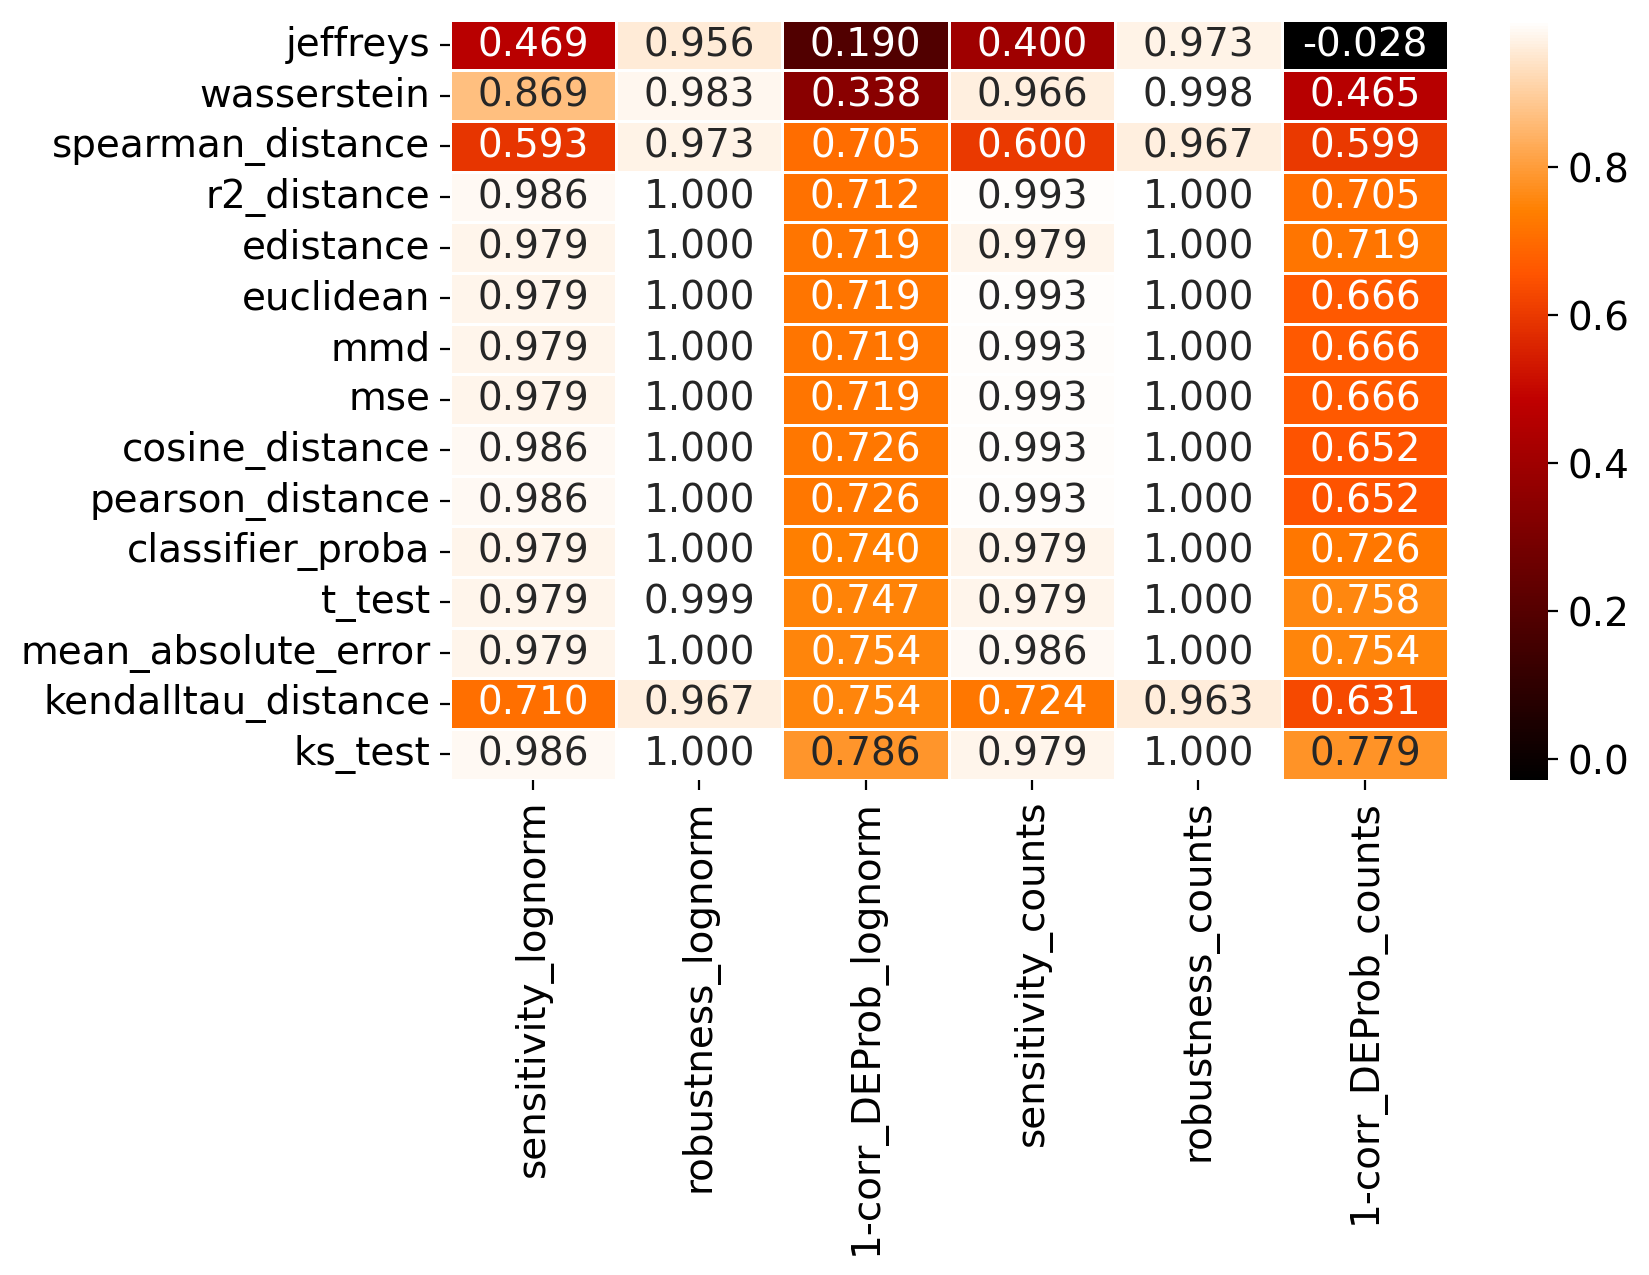

In [51]:
plt.figure(figsize=(8, 5))
sns.heatmap(agg, annot=True, cmap='gist_heat', fmt=".3f", linewidths=.5)
plt.grid(False)

In [44]:
agg.corr(method='spearman')

,sensitivity_lognorm,robustness_lognorm,1-corr_DEProb_lognorm,sensitivity_counts,robustness_counts,1-corr_DEProb_counts
sensitivity_lognorm,1.000000,0.814968,0.417067,0.761315,0.763810,0.553845
robustness_lognorm,0.814968,1.000000,0.319181,0.834762,0.821716,0.615102
1-corr_DEProb_lognorm,0.417067,0.319181,1.000000,0.141178,0.029464,0.654592
sensitivity_counts,0.761315,0.834762,0.141178,1.000000,0.974557,0.316109
robustness_counts,0.763810,0.821716,0.029464,0.974557,1.000000,0.296557
1-corr_DEProb_counts,0.553845,0.615102,0.654592,0.316109,0.296557,1.000000


In [52]:
agg.corr(method='pearson')

,sensitivity_lognorm,robustness_lognorm,1-corr_DEProb_lognorm,sensitivity_counts,robustness_counts,1-corr_DEProb_counts
sensitivity_lognorm,1.000000,0.968890,0.628457,0.986437,0.902306,0.791370
robustness_lognorm,0.968890,1.000000,0.661834,0.935911,0.907508,0.789195
1-corr_DEProb_lognorm,0.628457,0.661834,1.000000,0.591602,0.293702,0.923609
sensitivity_counts,0.986437,0.935911,0.591602,1.000000,0.879728,0.792870
robustness_counts,0.902306,0.907508,0.293702,0.879728,1.000000,0.504549
1-corr_DEProb_counts,0.791370,0.789195,0.923609,0.792870,0.504549,1.000000


Spearman of .76, .82, and .65 for CRP, robustness, and BioRep. Both values and ranking of values are highly correlated.